<a href="https://colab.research.google.com/github/stefanogiagu/corso_AI_2025/blob/main/ising_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
#create ising folder

Mounted at /content/drive


In [2]:
import os
ising_folder = '/content/drive/MyDrive/ising_data'

In [28]:
os.chdir(ising_folder)
!pwd

/content/drive/MyDrive/ising_data


In [12]:
#caricare i file pickle
os.chdir(ising_folder)
with open("ising_results.pkl", "rb") as f:
    data  = pickle.load(f)
    results = data["results"]

In [9]:
results[0]

{'initial_state': array([[ 1,  1,  1, ..., -1,  1, -1],
        [-1,  1, -1, ...,  1, -1, -1],
        [ 1, -1, -1, ...,  1,  1, -1],
        ...,
        [ 1,  1, -1, ..., -1,  1, -1],
        [-1,  1, -1, ..., -1, -1,  1],
        [ 1,  1,  1, ...,  1, -1, -1]]),
 'seed_ising': 956765220,
 'temperature': np.float64(0.01),
 'grid_size': 100,
 'n_steps': 2500,
 'simulation_id': '00.01',
 'final_state': array([[ 1, -1, -1, ...,  1,  1,  1],
        [ 1, -1, -1, ...,  1,  1,  1],
        [ 1, -1, -1, ...,  1,  1,  1],
        ...,
        [ 1, -1, -1, ...,  1,  1,  1],
        [ 1, -1, -1, ...,  1,  1,  1],
        [ 1, -1, -1, ...,  1,  1,  1]]),
 'magnetization': array([-0.0284, -0.0322, -0.0512, ..., -0.3   , -0.3   , -0.3   ]),
 'energy': 0.020000000000000018,
 'time': 16.788970232009888}

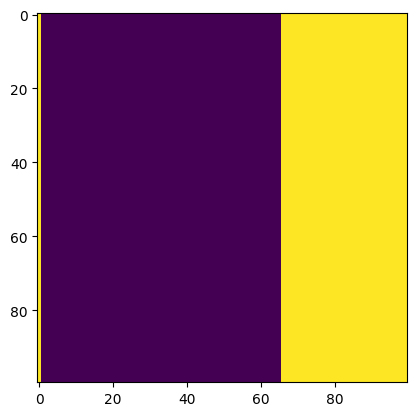

In [15]:
plt.imshow(results[0]["final_state"])

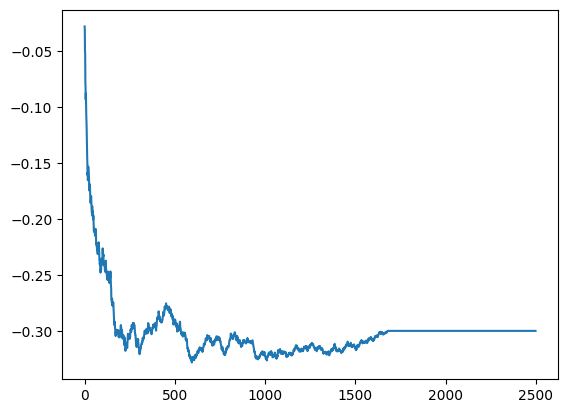

In [14]:
plt.plot(results[0]["magnetization"])

In [16]:
temperature_data = {}# fare medie di esempi alla stessa temperatura
time_array=[]#vogliamo fare un istogramma dei tempi di simulazione

for entry in results:
  temp = float(entry["temperature"])
  energy = entry["energy"]
  final_mag = entry["magnetization"][-1] # ultimo valore di array con m(t)
  t = entry["time"]
  time_array.append(t)

  if temp not in temperature_data:
    temperature_data[temp] = {"energy": [], "magnetization": [], "absolute_mag" : []}#se la temperatura è nuova allora creo il dizionario

  temperature_data[temp]["energy"].append(energy)
  temperature_data[temp]["magnetization"].append(final_mag)
  temperature_data[temp]["absolute_mag"].append(abs(final_mag))



In [18]:
np.log(10)

np.float64(2.302585092994046)

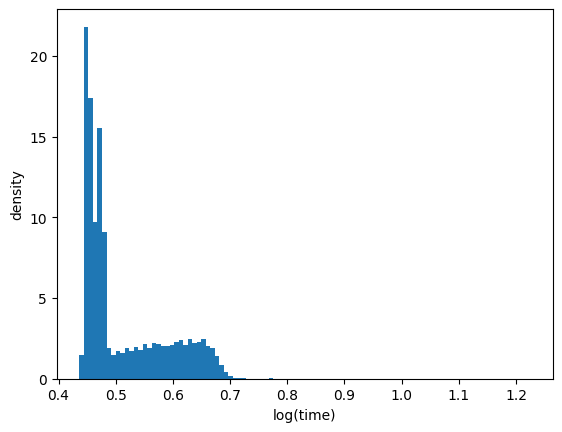

In [19]:
plt.hist(np.log10(time_array),100,density=True)
plt.xlabel("log(time)")
plt.ylabel("density")
plt.show()

In [23]:
#calcolo delle medie su insiemi alla stessa temperatura
temps =[]
avg_energies = []
avg_magnetizations=[]
all_energies=[]
all_magnetizations=[]
avg_abs_magnetizations=[]
all_temperature=[]

for temp, value in sorted(temperature_data.items()):
  temps.append(temp)
  avg_energies.append(np.mean(value["energy"]))
  avg_magnetizations.append(np.mean(value["magnetization"]))
  avg_abs_magnetizations.append(np.mean(value["absolute_mag"]))

  all_energies.extend(value["energy"])# fa listone di tutte le liste a tutte le temperature
  all_magnetizations.extend(value["magnetization"])
  all_temperature.extend([temp]*len(value["energy"]))


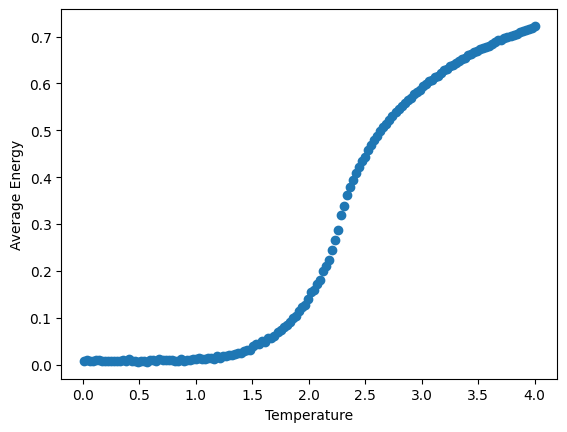

In [24]:
# scatter plot: average energy vs temperature
plt.scatter(temps, avg_energies)
plt.xlabel("Temperature")
plt.ylabel("Average Energy")
plt.show()